In [73]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Geting Data

In [5]:
columns=["User_Id","Item_Id",'Rating','Timestamp']
data=pd.read_csv('u.data',sep='\t',names=columns)
data.head(5)

,User_Id,Item_Id,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
df=data.copy()
df.shape

(100000, 4)

In [10]:
# Number of Unique Users
df['User_Id'].nunique()

943

In [12]:
# Number of Unique Movies
len(df['Item_Id'].unique())

1682

In [22]:
movies=pd.read_csv('u.item',sep='\|',header=None,encoding = "ISO-8859-1")
df1=movies.copy()
df1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df1.shape

(1682, 24)

In [34]:
df2=df1[[0,1]]
df2

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [35]:
df2.columns=['Item_Id','Movie_Name']
df2

,Item_Id,Movie_Name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [50]:
# Merging The Two DataFrames
df=pd.merge(df,df2,on='Item_Id')
df

,User_Id,Item_Id,Rating,Timestamp,Movie_Name_x,Movie_Name_y
0,196,242,3,881250949,Kolya (1996),Kolya (1996)
1,63,242,3,875747190,Kolya (1996),Kolya (1996)
2,226,242,5,883888671,Kolya (1996),Kolya (1996)
3,154,242,3,879138235,Kolya (1996),Kolya (1996)
4,306,242,5,876503793,Kolya (1996),Kolya (1996)
...,...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962),Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)","Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996),Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1...","Silence of the Palace, The (Saimt el Qusur) (1..."


# Exploratory Data Analysis

In [53]:
# Finding Average rating of movies

ans=df.groupby('Movie_Name_x').mean()

In [57]:
# Finding The Top Rated Movies
ans1=ans['Rating'].max()
ans[ans['Rating']==ans1]

,User_Id,Item_Id,Rating,Timestamp
Movie_Name_x,,,,
Aiqing wansui (1994),385.000000,1536.0,5.0,8.794413e+08
Entertaining Angels: The Dorothy Day Story (1996),675.000000,1653.0,5.0,8.894899e+08
"Great Day in Harlem, A (1994)",13.000000,814.0,5.0,8.863023e+08
Marlene Dietrich: Shadow and Light (1996),90.000000,1201.0,5.0,8.913837e+08
Prefontaine (1997),345.000000,1189.0,5.0,8.885378e+08
"Saint of Fort Washington, The (1993)",565.000000,1467.0,5.0,8.783198e+08
Santa with Muscles (1996),530.000000,1500.0,5.0,8.774704e+08
Someone Else's America (1995),437.000000,1599.0,5.0,8.801426e+08
Star Kid (1997),384.666667,1293.0,5.0,8.887183e+08


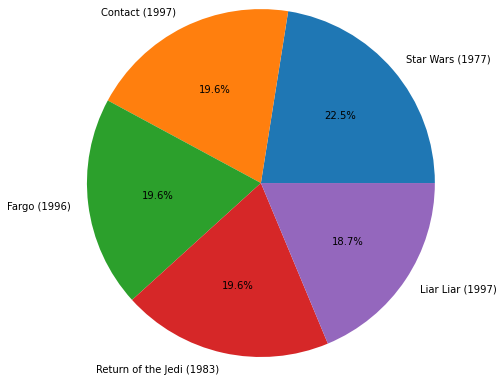

In [85]:
# Finding Most Watched Movies


ans3=df['Movie_Name_x'].value_counts()
mov=ans3.keys()[0:5]
mov1=list(mov)
values=list(ans3[0:5])
plt.pie(values,labels=mov1,autopct='%0.1f%%',radius=2)
plt.show()